In [1]:
library(tree)
library(GGally)
library(ggplot2)
library(plyr)
library(Rfast)
library(ggpubr)
library(ggpubr)
library(ggfortify)

Warning message:
"package 'tree' was built under R version 3.6.3"
Warning message:
"package 'GGally' was built under R version 3.6.3"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Registered S3 method overwritten by 'cli':
  method     from
  print.tree tree

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Warning message:
"package 'plyr' was built under R version 3.6.3"
Warning message:
"package 'Rfast' was built under R version 3.6.3"
Loading required package: Rcpp

Warning message:
"package 'Rcpp' was built under R version 3.6.3"
Loading required package: RcppZiggurat

Warning message:
"package 'RcppZiggurat' was built under R version 3.6.2"
Warning message:
"package 'ggpubr' was built under R version 3.6.3"
Loading required package: magrittr

Warning message:
"package 'magrittr' was built under R version 3.6.2"

Attaching package: 'ggpubr'


The following object is masked from 'package:plyr':

## Content


 1. Introduction  
   1.1 Problem and method  
   1.2 Hypothesis  
   1.3 Brief introduction to the life of a lamb  
 2. Dataset  
   2.1 Row description  
   2.2 Missing data  
 3. Analysis  
   3.1 Analysis focusing on lambs  
     3.1.1 Exploratory data analysis  
     3.1.2 ANOVA  
     3.1.2 Principal component analysis  
   3.2 Analysis focusing on ewes
 4. Conclusion  
     
     


# 1 Introduction

This report presents a study of a dataset from a sheep farm recorded between year 2000 to 2013. This particular farm, *Leirmo*, was in fact run by the authors parents. The weight of $n_{lambs} = 796$ lambs have been registered at multiple times per season, but the data set also includes some additional information. The aim of this report is to do inference on which factors affects the production of the sheep farm. By production we mean the quality and quantity of meat at the time of slaughtering.

## 1.1 Problem

A sheep farmer is confronted with multiple descisions over the course of a year, descisions that on both long and short term could have an impact on the production of the farm. On long term, maybe the most important question is which female lambs should be sent to the slaugther and which should be selected for further breeding. Other descisions are how long the sheep should graze in the mountains before they are brought back to the farm and when they should be sent for slaughter. 

Hence the statistical analysis will be performed from two different perspectives. Firstly inference with regards to the lambs. Which properties of the lambs determine their weight and the quality of their meat? Secondly with regards to the female sheep, the mother of the lambs, or more correctly the *ewe*. How does the properties of the ewe determine the weight of her lambs?

## 1.2 Hypothesis

Based on insight and the experience of the parents of the authors, the following relations are proposed as hypothesis for this report:

1. The ram lambs are in general heavier than the ewe lambs.
2. More siblings means lighter lambs, hence single lambs are more heavier than lambs with two siblings.

In general, traits are inherited: 

3. Heavy ewes will have heavier lambs.

## 1.3 Brief introduction to the life of a lamb

Some insight into the life of a lamb at the Leirmo farm is useful, if not neccessary to fully understand the dataset and the following analysis. It all begins with the breeding taking place around november. Most commonly a male sheep, or a ram, is bought from another farm and is kept for breeding a couple of years before a new is introduced, in order to ensure sufficient genetic variety. Around mid May the lambs are born and are fed with milk from their respective ewe. Gradually the lambs learn to consume grass and mid June they are released to graze in a mountain area untill they are collected around mid september. They will now graze on a field close to the farm before they are kept and fed in the barn. Finally the lambs that have a sufficient weight will be sent to slaughter around October / November, while the rest will either be fed for a couple additional weeks or be selected for breeding.

# 2 Dataset

The original dataset was stored as an .xls file with sheets looking like the one below, containing some of the data from 2004.

<img src="sheep_original_example.png" alt="drawing" width="600"/>

After cleaning the data, combining the different years, and restructuring the columns, obtain the following dataset

In [2]:
lamb = read.csv("sheep_data.csv",sep = ";",fileEncoding="UTF-8-BOM",nrows=795,header=TRUE)
lamb = lamb[,1:14]
lamb[sample(795,5),]

,year,id_mother,id_lamb,num_siblings,gender,saft,weight_spring,date_spring,weight_fall_I,date_fall_I,weight_fall_II,date_fall_II,weight_slaugther,slaugther_class
,<int>,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>
334,2006,4012,6039,2,S,s,18,38887,40,38970,46,40097,17.5,6
496,2008,6059,8019,2,V,s,15,39617,39,39712,43,39734,16.1,6
277,2005,2113,5017,2,V,s,23,38530,44,38612,54,38634,21.4,7
489,2008,6040,8046,2,S,s,16,39617,44,39712,46,39734,18.6,8
795,2013,10042,3009,2,V,s,NA,NA,40,41538,43,41559,NA,NA


In [3]:
lamb$growth = (lamb$weight_fall_I - lamb$weight_spring)/(lamb$date_fall_I - lamb$date_spring)

In [4]:
vars_set_I = c("year","num_siblings","gender","weight_spring","weight_fall_I","growth","weight_slaugther","slaugther_class")
set_I = lamb[complete.cases(lamb[,vars_set_I]),]
set_I$year = as.factor(set_I$year)
set_I$num_siblings = as.factor(set_I$num_siblings)
set_I$slaugther_class = as.factor(set_I$slaugther_class)

print("Years included in set_I")
unique(set_I$year)
print("Number of observations in set_I")
dim(set_I)[1]

vars_set_II = c("year","num_siblings","gender","weight_spring","weight_fall_I","growth")
set_II = lamb[complete.cases(lamb[,vars_set_II]),]
set_II$year = as.factor(set_II$year)
set_II$num_siblings = as.factor(set_II$num_siblings)
set_II$slaugther_class = as.factor(set_II$slaugther_class)


print("Years included in set_II")
unique(set_II$year)
print("Number of observations in set_II")
dim(set_II)[1]

[1] "Years included in set_I"


[1] 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
Levels: 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009

[1] "Number of observations in set_I"


[1] 425

[1] "Years included in set_II"


[1] 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
Levels: 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010

[1] "Number of observations in set_II"


[1] 589

## 2.1 Row description

Each row contains the registered data on one lamb. The columns represent the following

- `year` is the year the data was recorded.
- `id_mother` is the unique number on the eartag of the ewe.
- `id_lamb` is the unique number on the eartag of the lamb.
- `num_siblings` is the number of siblings of the lamb.
- `gender` encodes the gender, where `V` is ram or male and `S` is female or ewe.
- `saft` encodes what happens to the lamb. `s` : slaugther, `a` : selected for breeding, `f` : more feeding before slaugther, `t` : the lamb died / was lost on the mountain.
- The whole lamb is weighed on three different times and registered in kilos in the columns `weight_spring`, `weight_fall_I` and `weight_fall_II`.
- The dates when the weighing took place, represented by number of days since 01.01.1990 is given by `date_spring`, `date_fall_I` and `date_fall_II`.
- `weight_slaugther` is the weight of the carcass, meaning the wool, head, intestines etc. is removed.
- `slaugther_class` is an integer encoding of the *EUROP* classification<sup> [1](#europ)</sup>, where a larger number means larger and more convex, body-builder-like muscles. The encoding is given by: `1` : P-, `2` : P, `3` : P+, `4` : O-, `5` : O, `6` : O+, `7` : R-, `8` : R, `9`: R+.

As we have the lamb weight at two different points in time we introduce the variable `growth` defined as

$$
\text{growth} = \frac{\text{weight_fall_I}-\text{weight_spring}}{\text{date_fall_I}-\text{date_spring}}
$$

which represents the daily weight gain of a lamb between the weighing at the spring and fall in the unit $\frac{kg}{day}$


<a name="europ">1:</a> <a href="https://www.animalia.no/no/kjott--egg/klassifisering/klassifiseringshandboka/402s-smafe-klassebeskrivelser-7/">Description of EUROP classes for sheep</a> animalia.no 2020

## 2.2 Missing data

To weigh 60 lambs is quite a task, and is a labour intensive form of data collection. That could help explain the holes in the table below. An `x` in the table represents that weighing took place that year, and was registered, at that specific time in the season. Hence we see that 2002, 2003 and 2010 - 2013 have incomplete dataset.

|year|weight spring|weight fall I|weight fall II|weight slaughter|
|---|---|---|---|---|
|2000|x|x|x|x|
|2001|x|x|x|x|
|2002|x|x||x|
|2003|x|x||x|
|2004|x|x|x|x|
|2005|x|x|x|x|
|2006|x|x|x|x|
|2007|x|x|x|x|
|2008|x|x|x|x|
|2009|x|x|x|x|
|2010|x|x|x||
|2011||x|x|x|
|2012||x|||
|2013||x|x|x|

This covers the large pattern of missing data, however, for lambs who die or are lost in the mountain, or are selected for breeding we will also have missing data. The consequence of this is that the statistical analysis will have to depend on a subset of the data, depending on which variables that are studied.

# 3 Analysis


## 3.1 Analysis focusing on lambs

### 3.1.1 Exploratory data analysis

Lets explore the data and start by studying a pair plot where we require that all rows are complete for a subset of the variables. We first require complete data for the variables (we know `year`,`num_siblings`,`gender` and `saft` are complete for all rows)

- `weight_spring`
- `weight_fall_I`
- `weight_slaugther`
- `slaugther_class`


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better valu

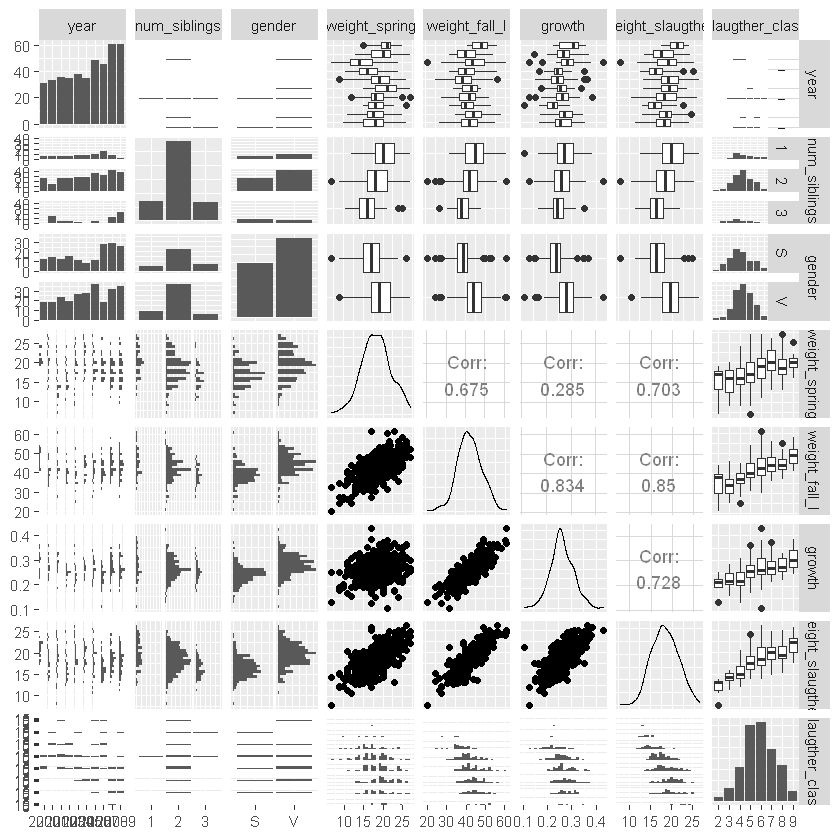

In [5]:
ggpairs(set_I[,vars_set_I])

We first notice that for the variables `weight_spring`, `weight_fall_I`, `growth`, `weight_slaugther` and `slaugther_class` we seem to have a normal distribution. In this subset we have an imbalance of the gender, as all ram lambs (`gender=V`) are sent for slaugther, while a subset of the ewe lambs (`gender=S`) are selected for breeding. A balanced dataset have to exclude the variables from the slaugthering or we would have to draw a random sample of the ram lambs.

Furthermore we observe that all variables related to weight are correlated, as well as `slaugther_class`. As the last variable is a characterization of the shape of the lamb carcass, it is not unlikely that is correlated with weight. We also observe that `gender` and `num_siblings` seems to have an effect on the weight. It seems like the ewe lambs are lighter than the rams and that lambs with few siblings are heavier.

### 3.1.2 ANOVA

For hypothesis 1 and 2 a two way ANOVA is suitable. We will study how `gender` and `num_siblings` could explain first `weight_fall_I` and then `growth`.

We will now study the dataset `set_II` which has complete entries from year 2000 - 2010. Below we see that we have a fairly balanced distribution in terms of gender (except for the triplets), however for number of siblings there are many more twin lambs, than in the other populations. 

In [6]:
distribution = count(set_II,vars=c("num_siblings","gender"))
distribution
distribution_years = count(set_II,vars=c("year"))
#distribution_years

num_siblings,gender,freq
<fct>,<fct>,<int>
1,S,42
1,V,52
2,S,196
2,V,200
3,S,60
3,V,39


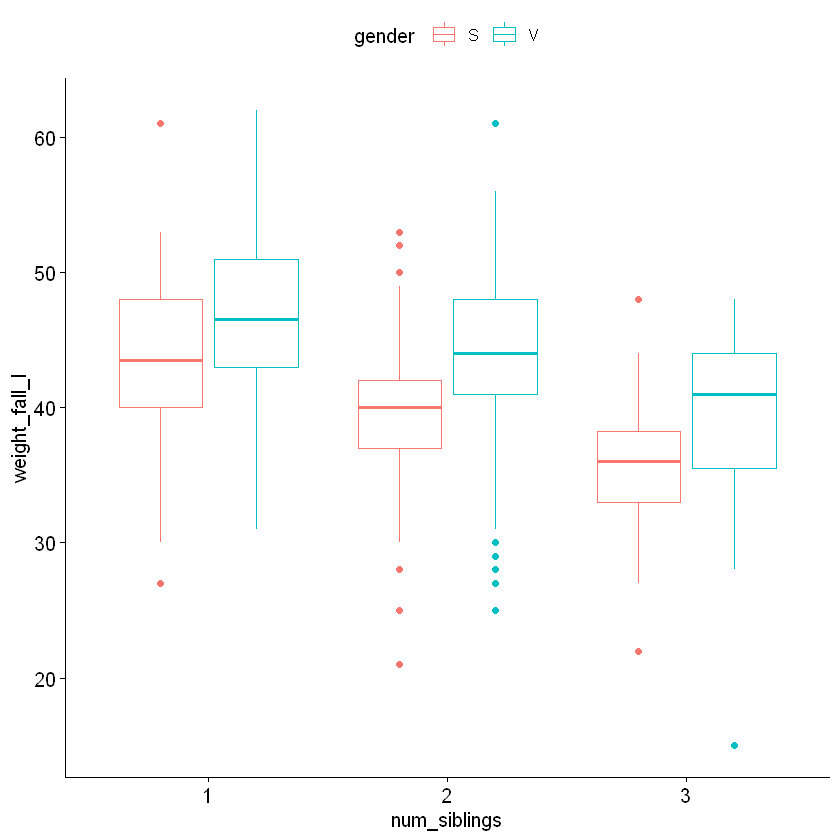

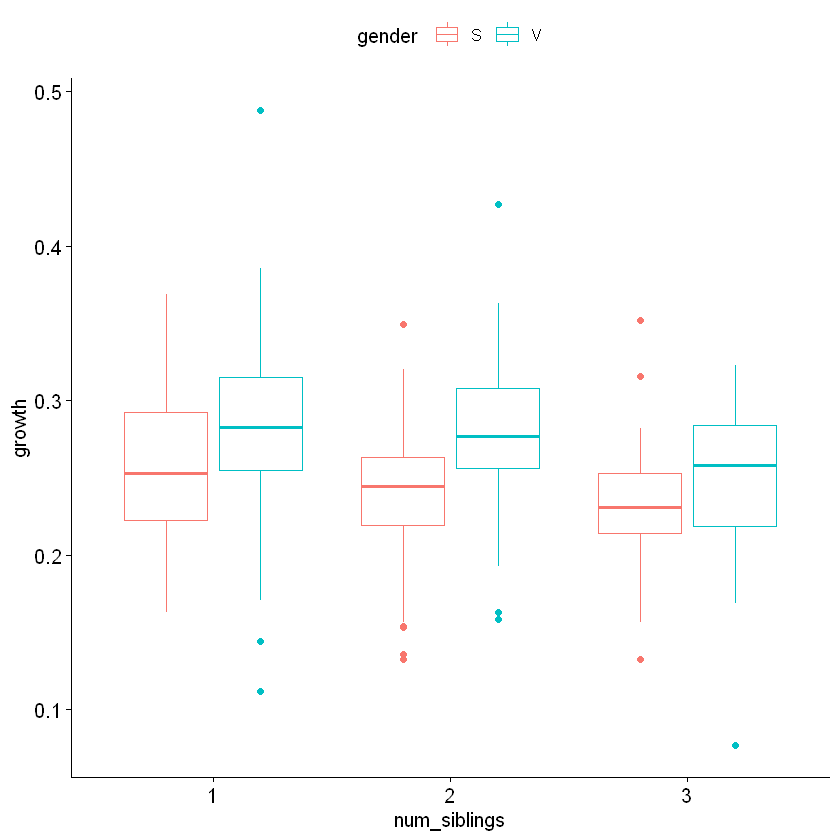

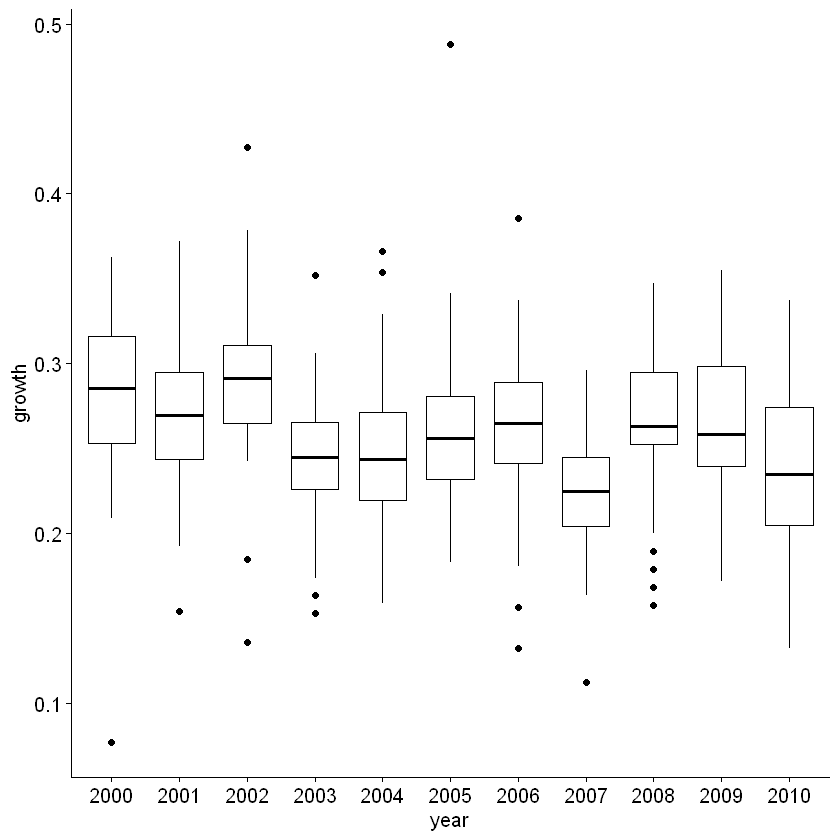

In [7]:
ggboxplot(set_II, x = "num_siblings", y = "weight_fall_I", color = "gender")
ggboxplot(set_II, x = "num_siblings", y = "growth", color = "gender")

ggboxplot(set_II, x = "year", y = "growth")

The boxplots above seems to support our hypothesis. However, it is interesting to note how the difference in growth seems to be less significant between the different `num_siblings` populations. Lets proceed with a hypothesis test for both `weight_fall_I` and `growth`.

**Lets first recall the principles behind a two factor ANOVA:**

We could frame the problem as the following model

$$
\begin{aligned}
y_{ijk} &= \mu + \alpha_i + \gamma_j + \epsilon_{ijk} & i = 1,..,r, \; j = 1,..,s, \; k = 1,..,n_{ij}
\end{aligned}
$$

where $y$ is the predictor, $\mu$ the global average, $\alpha_i$ is the effect of the first treatment of level $i$, $\gamma_j$ is the effect of the second treatment of level $j$ and finally $\epsilon_{ijk}$ is the error for the individual sample. 

In our case we have $y = $ `weight_fall_I`, `growth`. If $\alpha$ represents `gender`, then $r = 2$ and then $\gamma$ represents `num_siblings` and $s = 3$. $n_{ij}$ is given by the table above. By introducing a suitable full rank design matrix $X$ we could write the model a the linear regression 

$$
y = X\beta + \epsilon
$$

with $\beta = [\mu,\alpha,\gamma]^T$ where $\alpha$ and $\gamma$ are vectors. 



In [8]:
options(contrasts=c("contr.treatment", "contr.poly"))
model_w = lm(weight_fall_I ~ num_siblings + gender,data=set_II,x=TRUE)
n = dim(model_w$model)[1]
summary(model_w)
anova(model_w)

model_g = lm(growth ~ num_siblings + gender,data=set_II,x=TRUE)
summary(model_g)
anova(model_g)

options(contrasts=c("contr.sum", "contr.poly"))
model_y = lm(growth ~ year,data=set_II,x=TRUE)
summary(model_y)


Call:
lm(formula = weight_fall_I ~ num_siblings + gender, data = set_II, 
    x = TRUE)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.957  -3.174   0.172   3.826  18.404 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    42.5961     0.6288  67.743  < 2e-16 ***
num_siblings2  -2.7681     0.6396  -4.328 1.77e-05 ***
num_siblings3  -6.9847     0.8057  -8.669  < 2e-16 ***
genderV         4.3456     0.4613   9.420  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.572 on 585 degrees of freedom
Multiple R-squared:  0.2394,	Adjusted R-squared:  0.2355 
F-statistic: 61.38 on 3 and 585 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
num_siblings,2,2961.320,1480.66024,47.69746,6.463703e-20
gender,1,2754.443,2754.44304,88.73064,1.033912e-19
Residuals,585,18160.009,31.04275,NA,NA



Call:
lm(formula = growth ~ num_siblings + gender, data = set_II, x = TRUE)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.181836 -0.021572  0.000595  0.025451  0.198730 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.255708   0.004746  53.877  < 2e-16 ***
num_siblings2 -0.012401   0.004828  -2.569   0.0105 *  
num_siblings3 -0.030316   0.006082  -4.985 8.18e-07 ***
genderV        0.033367   0.003482   9.582  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.04205 on 585 degrees of freedom
Multiple R-squared:  0.1793,	Adjusted R-squared:  0.175 
F-statistic: 42.59 on 3 and 585 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
num_siblings,2,0.06357532,0.031787661,17.9733,2.659016e-08
gender,1,0.16239379,0.162393788,91.8203,2.672879e-20
Residuals,585,1.03463356,0.001768604,NA,NA



Call:
lm(formula = growth ~ year, data = set_II, x = TRUE)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.205390 -0.026099 -0.000204  0.026532  0.227642 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.259072   0.001811 143.042  < 2e-16 ***
year1        0.023241   0.006302   3.688 0.000247 ***
year2        0.008071   0.006234   1.295 0.195946    
year3        0.029235   0.006045   4.836 1.70e-06 ***
year4       -0.013970   0.005821  -2.400 0.016712 *  
year5       -0.008134   0.005719  -1.422 0.155477    
year6        0.001090   0.005930   0.184 0.854172    
year7        0.002235   0.005326   0.420 0.674867    
year8       -0.033703   0.005446  -6.188 1.15e-09 ***
year9        0.009132   0.004924   1.855 0.064129 .  
year10       0.006673   0.005014   1.331 0.183774    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.04325 on 578 degrees of freedom
Multiple R-squared:  0.1425,	Adjuste

Given a significance level of the usual $\alpha = 0.05$ we notice by observing the p-values in the print out from the linear regression  `Pr(>|t|)`, that all coefficients (of the different levels of the treatments) are significant individually. Meaning it is unlikely that the respective coefficients are zero. We notice that the p-value for `num_sibling2` when estimating `growth` is relatively larger than the rest, meaning that it is more likely that there is no difference in the growth between a single lamb and a twin. 

The p-values, `Pr(>F)`, from the ANOVA test says something about the likelihood of the effect in general, to be zero. For `num_siblings` it is a test of how likely it is that any number of siblings would yield a significant different `growth` or `weight_fall_I`. Again, we observe small p-values, meaning that it is unlikely that `num_siblings` or `gender` in general has no effect on growth or weight.

By this analysis, the effects on the weight could be quite large. Notice that the base case is a single ewe, with weight given by the intercept. Comparing the expected weight in the fall of a triplet ewe with a single ram we have (by taking the values of the coefficients)

$$
\begin{aligned}
\Delta w &=  w_{ram,n=1} - w_{ewe,n=3}\\
&= 42.6 + 4.3 - (42.6 - 7.0)\\
&= 11.3
\end{aligned}
$$

here all values are given in kg. Given this analysis and the dataset `set_II`, it seems likely that hypothesis 1 and 2 is true.

As a bonus, for the interest reader, the same analysis was performed to see if there is any effect on growth between different years. And, in fact there is a significant difference in growth rate between some years. What could be the cause of this? That is an interesting question for further research.

### 3.1.2 Principal component analysis

Principal component analysis utilizes the spectral theorem in order to find a transformation of the data matrix $X$ with diagonal covariance matrix with decreasing variances in the diagonal, and zero column wise mean. As the estimated covariance matrix is symmetric, we have the following decomposition

$$
S = U\Lambda U^T
$$

where $U$ is the orthonormal eigenvectors of $S$ and with $\Lambda$ having the respective eigenvalues in decreasing order on the diagonal. Let $\mu$ be the column wise mean of the datamatrix $X$. We then have the principal components given by

$$
Z = U^T(X-\mu)
$$

which will have the covariance  $Cov(Z) = \Lambda$.

Now why is this relevant for studying the lamb dataset? One could interpret the PCA as to provide new variables which are a linear combination of the old ones. Studying the two first new variables, or the *loadings* in the dataset, $u_1$ and $u_2$ an the corresponding tranformed data, or the *scores*, $z_1$ and $z_2$. By doing this we obtain a dimensionality reduction, and plotting the two loadings and the corresponding scores with the largest proportion of variance, we could explore relations between the original variables. Below, this is done in the biplot, where the loadings are plotted as labeled arrows, and the scores are labeled with the gender encoding together with the number of siblings.

In [9]:
label = paste(set_II$gender,as.character(set_II$num_siblings))

,PC1,PC2,PC3,PC4,PC5
num_siblings,0.3024235,0.71619361,-0.41067611,-0.47602645,-0.01872680
weight_spring,-0.4497558,-0.30157840,0.01054801,-0.76248934,0.35393356
weight_fall_I,-0.5844082,0.03568631,-0.30916592,-0.02139614,-0.74910095
gender,-0.3337499,0.55844186,0.75859687,-0.02530014,-0.02538524
growth,-0.5033269,0.28807352,-0.40022630,0.43693356,0.55909185


[1] "Proportion of variance explained by pcomp 1 and 2:"


[1] 0.7219984

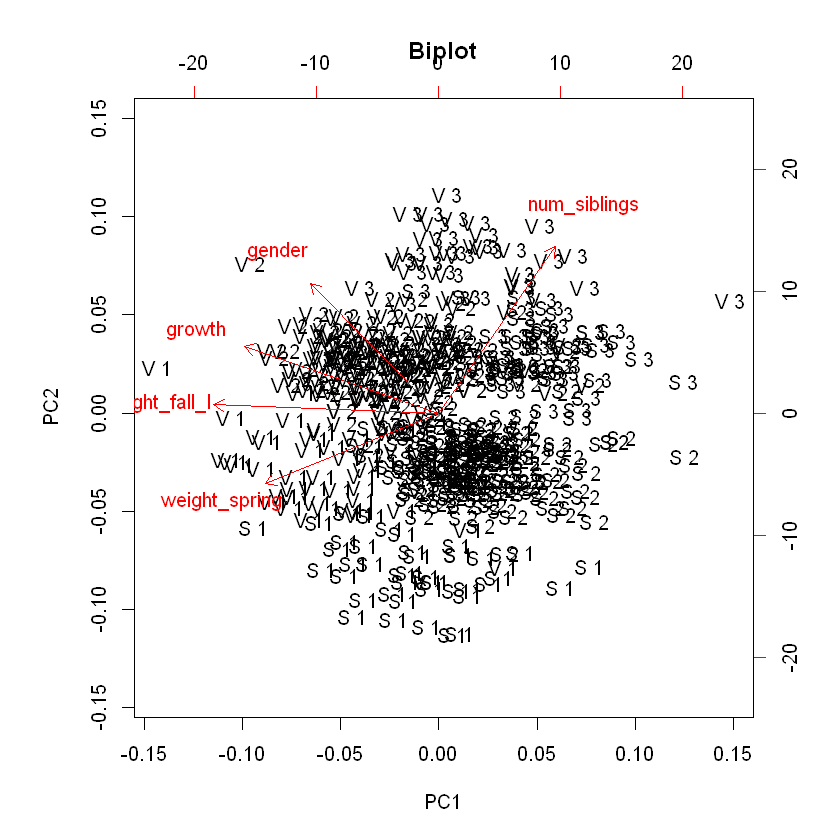

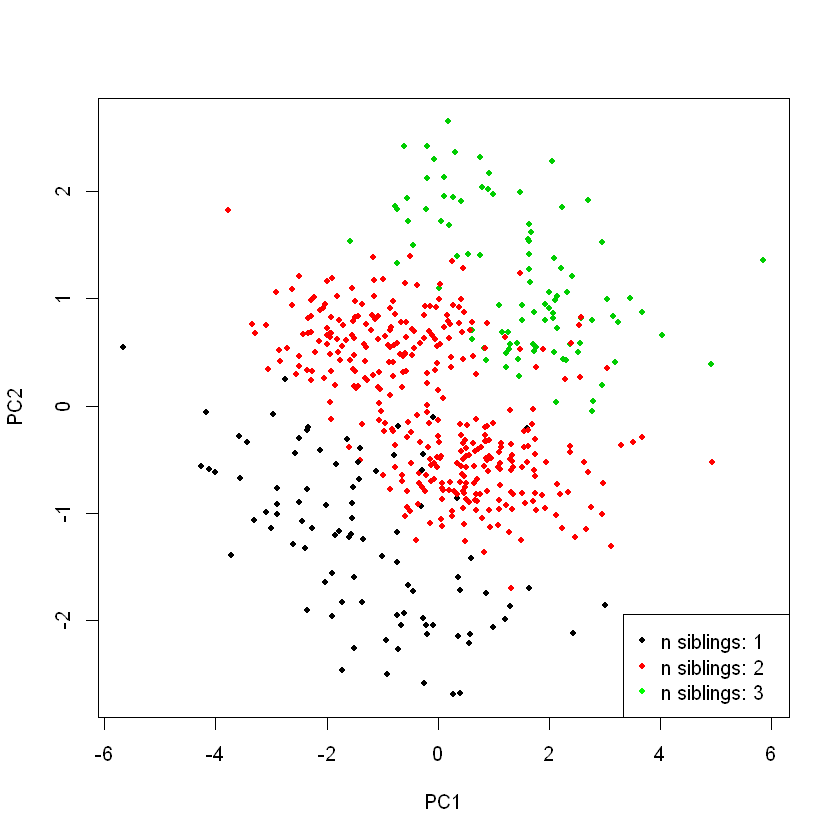

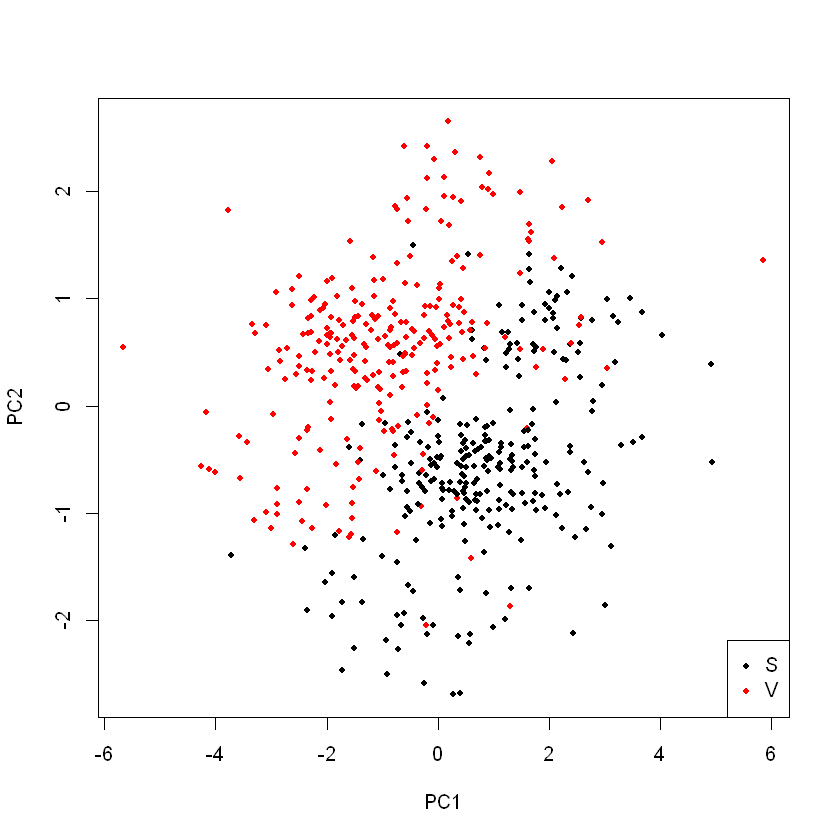

In [10]:
pca_var = c("num_siblings","weight_spring","weight_fall_I","gender","growth")

set_II$gender = as.integer(set_II$gender)
set_II$num_siblings = as.integer(set_II$num_siblings)

subset_PCA = set_II[,pca_var]
pca = prcomp(subset_PCA,scale=TRUE)
pca$rotation

var = pca$sdev^2
prop_var = var/sum(var)
print("Proportion of variance explained by pcomp 1 and 2:")
sum(prop_var[1:2])


biplot(pca,xlabs=label)
title("Biplot")
plot(pca$x,col=subset_PCA$num_siblings,pch=20)
legend("bottomright", c("n siblings: 1","n siblings: 2","n siblings: 3"),pch=20,col=c("black","red","green"))
plot(pca$x,col=subset_PCA$gender,pch=20)
legend("bottomright", c("S","V"),pch=20,col=c("black","red"))

It seems like the first loading, given by the x-axis labeled PC1 is related to weight, as lambs with increasing weight and growth are found by going in negative direction of PC1. PC2 is not as easy to interpret, but seems to be related to other properties like gender and number of siblings.

Not suprisingly we also see here that the rams have are more likely to be heavier than the ewes. A similar relationship holds for number of siblings, where more siblings increases the probability for lower weight. However, it is interesting to notice that `weight_spring` seems to be determined to a greater extent by `num_siblings` than `gender`. On the other hand, `growth` seems to be determined to a greater extent by `gender` and is less sensitive to `num_siblings`. 

## 3.2 Analysis focusing on ewes

We will now examine if traits from the mothers of the lambs, the ewes, have an effect on the traits of the lambs. Below we produce an aggregated data set where each row represents an ewe. In contrast to the lamb dataset this dataset is not specific to a certain year. The columns represents the following

- `nlamb` is the total number of lambs that the ewe has given birth to.
- `num_as_lamb` is the number of number of siblings the ewe had growing up + 1.
- `mean_num` is the average number of lambs the ewe has given birth to each season.
- `weight_as_lamb` is the weight of the ewe as lamb, where the time of weight is chosen by the `weight_var`. 
- `growth_as_lamb` is the growth (as defined above) of the ewe as lamb.
- `mean_weight` is the mean weight of the lambs of the respective ewe, where the time of weight is chosen by the `weight_var`. 
- `mean_growth` is the mean growth of the lambs of the ewe.

Furthermore, due to missing data in the lamb set, we will also get missing data in this dataset. Below we select a subset with complete samples, denoted `sheep_complete` and furthermore we select a subset of ewes that have had more than two lambs. The final dataset we are analyzing is named `sheep_complete_mtwo`. 

In [11]:
sheep_index = unique(lamb$id_mother)
s = length(sheep_index)
sheep = data.frame(id = sheep_index,nlamb=integer(s),mean_weight=double(s),weight_as_lamb=double(s),growth_as_lamb=double(s),mean_growth=double(s),mean_num=double(s),num_as_lamb=double(s))
weight_var = "weight_fall_I"


for (i in 1:s) {
    
    index = which(lamb$id_mother == sheep_index[i])
    nlamb = length(index)
    as_lamb_index = which(lamb$id_lamb == sheep_index[i])
    num = count(lamb[index,],vars="num_siblings")

    sheep$nlamb[i] = nlamb
    sheep$num_as_lamb[i] = lamb[as_lamb_index[1],"num_siblings"]
    sheep$mean_num[i]=sum(num[,2]*num[,1])/length(index)
    sheep$weight_as_lamb[i] = lamb[as_lamb_index[1],weight_var]
    sheep$growth_as_lamb[i] = lamb[as_lamb_index[1],"growth"]
    sheep$mean_weight[i] = mean(lamb[index,weight_var])
    sheep$mean_growth[i] = mean(lamb[index,"growth"])
}

vars = c("nlamb","num_as_lamb","mean_num","weight_as_lamb","mean_weight","growth_as_lamb","mean_growth")

print("Total number of ewes")
length(sheep_index)

sheep_complete = sheep[complete.cases(sheep),]
print("Total number of complete samples")
dim(sheep_complete)[1]

print("Total number of ewes with more than 2 lambs")
sheep_complete_mtwo = sheep_complete[sheep_complete$nlamb > 2,]
dim(sheep_complete_mtwo)[1]

sheep_complete_mtwo[sample(20,5),]

[1] "Total number of ewes"


[1] 135

[1] "Total number of complete samples"


[1] 56

[1] "Total number of ewes with more than 2 lambs"


[1] 37

,id,nlamb,mean_weight,weight_as_lamb,growth_as_lamb,mean_growth,mean_num,num_as_lamb
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,4012,10,41.30000,45,0.2804878,0.2590523,2.000000,2
54,2123,7,43.42857,48,0.2912621,0.2708903,1.857143,2
37,1056,5,37.60000,42,0.2692308,0.2272014,1.800000,2
47,2105,11,39.27273,50,0.3106796,0.2467756,2.090909,2
34,1044,10,45.50000,42,0.2948718,0.2750852,1.800000,2



Call:
lm(formula = mean_weight ~ weight_as_lamb + growth_as_lamb, data = sheep_complete_mtwo)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4312 -1.8233 -0.5612  2.2102  7.4693 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     43.6738     5.8988   7.404 1.38e-08 ***
weight_as_lamb  -0.4357     0.1595  -2.731  0.00993 ** 
growth_as_lamb  60.6751    21.3928   2.836  0.00764 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.056 on 34 degrees of freedom
Multiple R-squared:  0.2228,	Adjusted R-squared:  0.177 
F-statistic: 4.872 on 2 and 34 DF,  p-value: 0.01379


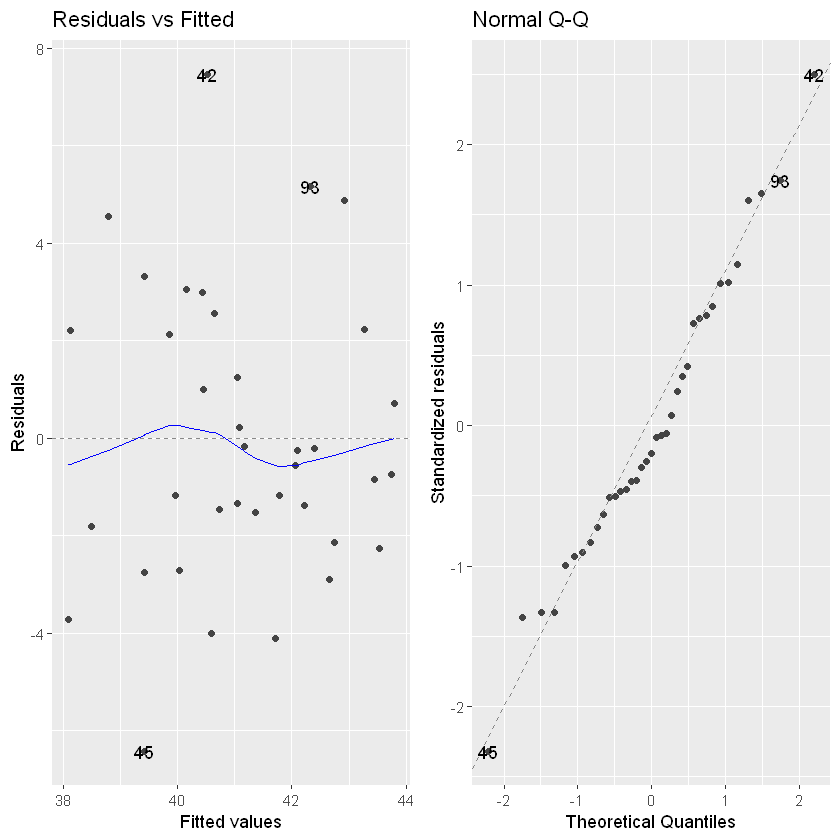

In [12]:
sheep_complete_mtwo$num_as_lamb = as.factor(sheep_complete_mtwo$num_as_lamb)
ggpairs(sheep_complete_mtwo[,vars])

lm1 = lm(mean_weight ~ weight_as_lamb + growth_as_lamb,data =sheep_complete_mtwo)
summary(lm1)
autoplot(lm1)[1:2]

Above, we use a linear regression model aiming at exploring if there is a relation between the `mean_weight` of the lambs of an ewe and her `weight_as_lamb` and `growth_as_lamb`. The regression is conducted on the `sheep_complete_mtwo` dataset with $n=37$ ewes. 

For a linear regression model 

$$
y = X\beta + \epsilon
$$

where $y,\beta,\epsilon$ are vectors, we have, in order to make inference, the following assupmtions has to hold

1. The residuals $\epsilon_i$ are identically normally distributed with $E[\epsilon_i] = 0$ and $Var[\epsilon_i] = \sigma^2$
2. The elements $\epsilon_i$ are independent.

In the Turkey-Anscombe plot (Residuals VS Fitted) we can check if the residuals have identical distributions, and if the mean is zero. This seems to hold fairly well. Furthermore the qq-plot is used to check if the residuals follow a normal distribution. The distribution of the residuals is plotted agains a theoretical normal distribution. Again, this also seems to hold fairly well, however we notice some deviation in the left tail of the distribution of the residuals. 

When these assumptions hold, we can check if the p-value of the different coefficients is significant as we know that their corresponding f-statistic follows a t-student distribution. Given a significance level of $\alpha = 0.05$, we notice that both coefficients, `weight_as_lamb` and `growth_as_lamb`, are likely to be significant. However, observing that the fraction of variance explained by the model, $R^2 = \frac{\text{SSR}}{\text{SST}} = 0.2228$, indicates that the fit of the model is not too good.

It is interesting to note that `weight_as_lamb` has a negative coefficient, meaning ewes that where heavier as lambs tend to get lambs that are lighter, whereas ewes that had a higher daily growth rate tend to get heavier lambs.

# 4 Conclusion

This report started with presenting three hypothesis, where the two first were tested with an ANOVA analysis. This analysis gave strong support for these hypothesis, hence it seems likely that both weight and growth seems to some extent to be determined by gender and number of siblings. This analysis also found significant differences in the growth rates between different years. For a sheep farmer, explaining these differences would be of high interest.

Furthermore, the principle component analysis gave some insight into the how gender and number of siblings affect weight at different times of the season. It seemed to indicate that `weight_spring` is more determined by `num_siblings` and less by `gender`, whereas `growth` is to a greater extent determined by `gender`. However, no firm conclusions could be drawn from this analysis, only an indication of what could be interesting for further investigations. 

Finally, the results of the linear regression on `mean_weight` of the lambs of each individual ewe yielded results that were less significant than the ANOVA analysis, and the fit of the regression was not too good. Furthermore due to lack of data, this regression used only $n=37$ datapoints. Interestingly the results support falsifying the third hypothesis, that heavy ewes get heavy lambs, and indicates instead that ewes that were light in the fall get lambs that are heavier in the fall. However, the regression indicates that a high growth rate of the ewe yield high growth rate for the lambs.